**1. Sample project for Color detection**

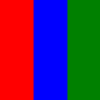

Detected Colors: ['Blue', 'Red', 'Green']


In [19]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

colors = {
    "Red": [(0, 0, 128), (100, 100, 255)],
    "Green": [(0, 128, 0), (100, 255, 100)],
    "Blue": [(100, 0, 0), (255, 100, 100)],
    "Yellow": [(0, 200, 200), (100, 255, 255)],
    "Orange": [(10, 128, 200), (150, 250, 255)],
    "Purple": [(128, 0, 128), (200, 100, 200)],
    "Brown": [(42, 42, 128), (100, 100, 200)],
    "Black": [(0, 0, 0), (50, 50, 50)],
    "White": [(200, 200, 200), (255, 255, 255)],
    "Gray": [(100, 100, 100), (200, 200, 200)]
}

def get_color_name(pixel):
    for name, (lower, upper) in colors.items():
        if all(lower[i] <= pixel[i] <= upper[i] for i in range(3)):
            return name
    return "Unknown"

def detect_colors(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))
    cv2_imshow(img)

    unique_colors = {}
    for row in img:
        for pixel in row:
            color = get_color_name(pixel)
            if color != "Unknown":
                unique_colors[color] = unique_colors.get(color, 0) + 1

    sorted_colors = [c for c, _ in sorted(unique_colors.items(), key=lambda x: x[1], reverse=True)]
    print("Detected Colors:", sorted_colors)

image_path = "/content/1_colordetecting.PNG"
detect_colors(image_path)


**2.Data structures for Image Analysis -Write a program that
computes the T-pyramid of an image**

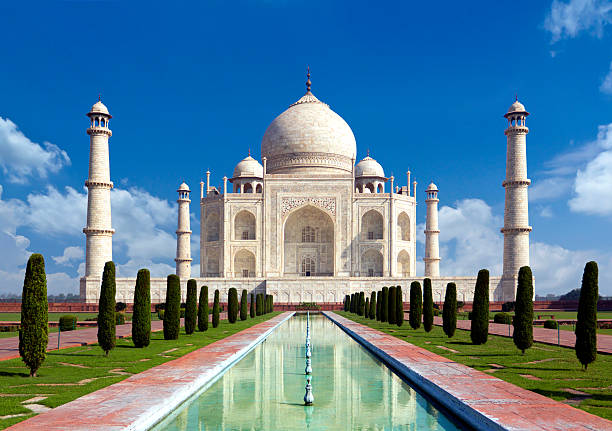

Level 0 (Original Image)


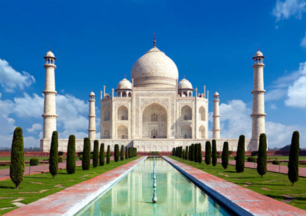

Level 1 (Downsampled)


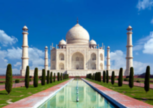

Level 2 (Downsampled)


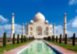

Level 3 (Downsampled)


In [21]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def compute_t_pyramid(image_path, levels=4):
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Image not found!")
        return

    cv2_imshow(img)
    print("Level 0 (Original Image)")

    pyramid = [img]

    for i in range(1, levels):
        img = cv2.pyrDown(img)
        pyramid.append(img)
        cv2_imshow(img)
        print(f"Level {i} (Downsampled)")

    return pyramid

# Example usage
image_path = "/content/2_tajmahal.jpg"
t_pyramid = compute_t_pyramid(image_path)


**3.Sample project for Image Smoothing**

**ORIGINAL IMAGE**

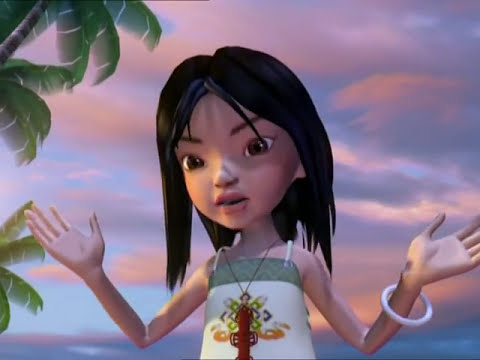

**AVERAGING BLUR**

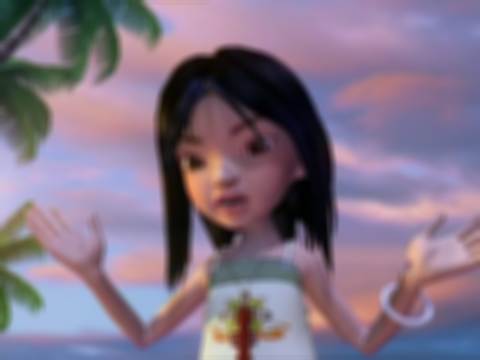

**GAUSSIAN BLUR**

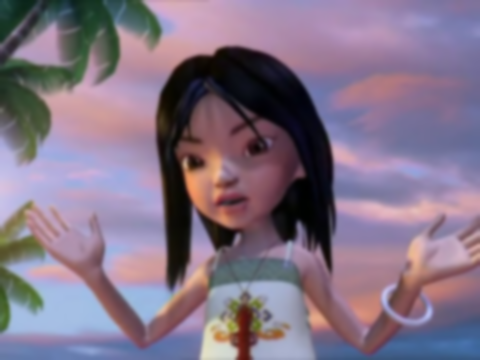

**MEDIAN BLUR**

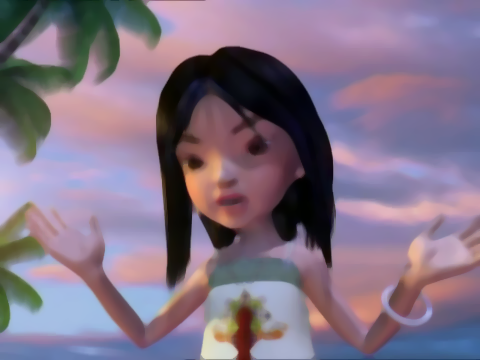

**BILATERAL FILTER**

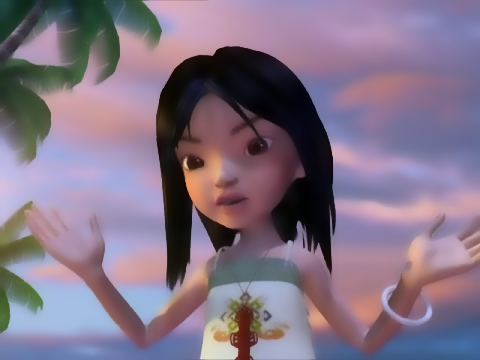

In [30]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, Markdown

image_path = "/content/3_smoothing.jpg"
img = cv2.imread(image_path)

def show_with_heading(image, heading):
    display(Markdown(f"**{heading.upper()}**"))
    cv2_imshow(image)

show_with_heading(img, "Original Image")

avg_blur = cv2.blur(img, (9,9))
show_with_heading(avg_blur, "Averaging Blur")

gaussian_blur = cv2.GaussianBlur(img, (9,9), 0)
show_with_heading(gaussian_blur, "Gaussian Blur")

median_blur = cv2.medianBlur(img, 9)
show_with_heading(median_blur, "Median Blur")

bilateral_blur = cv2.bilateralFilter(img, 15, 100, 100)
show_with_heading(bilateral_blur, "Bilateral Filter")


**4.Sample project for Edge detection using Sobel ,Canny edge**

**ORIGINAL IMAGE**

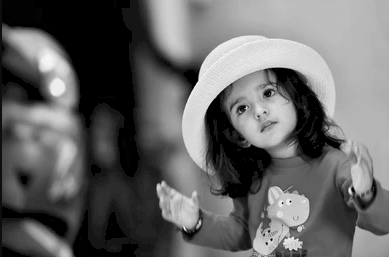

**SOBEL X EDGE DETECTION**

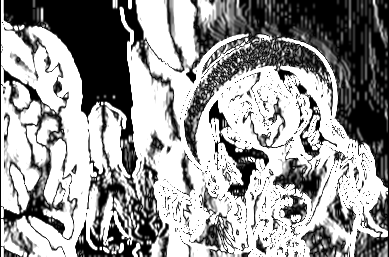

**SOBEL Y EDGE DETECTION**

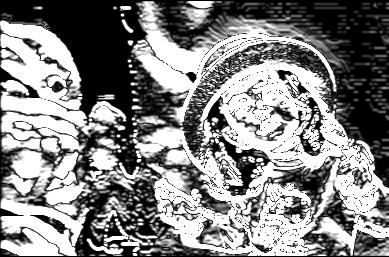

**CANNY EDGE DETECTION**

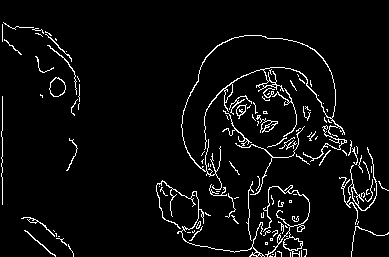

In [33]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = "/content/4_edgedetection.PNG"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def show_with_heading(image, heading):
    from IPython.display import display, Markdown
    display(Markdown(f"**{heading.upper()}**"))
    cv2_imshow(image)

show_with_heading(img, "Original Image")

sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
show_with_heading(cv2.convertScaleAbs(sobelx), "Sobel X Edge Detection")

sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
show_with_heading(cv2.convertScaleAbs(sobely), "Sobel Y Edge Detection")

canny = cv2.Canny(img, 100, 200)
show_with_heading(canny, "Canny Edge Detection")


**5.Object Detection with OpenCV**

**● Detect simple objects like faces, eyes, or hands using
OpenCV and Haar cascades.**

**● Libraries: OpenCV, NumPy**

**FACE AND EYE DETECTION**

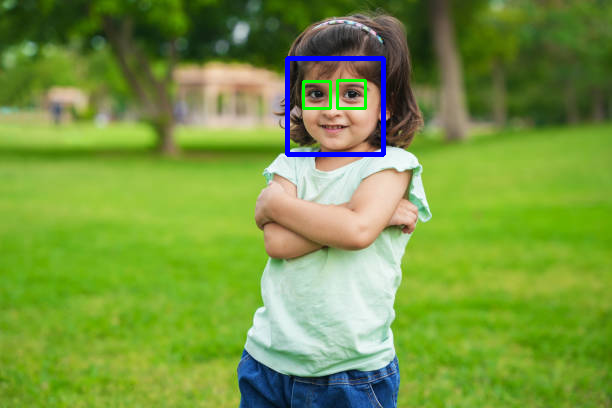

In [32]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, Markdown

def show_with_heading(image, heading):
    display(Markdown(f"**{heading.upper()}**"))
    cv2_imshow(image)

image_path = "/content/5_objectdetecting.jpg"
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 3)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 3)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

show_with_heading(img, "Face and Eye Detection")
